# The PyData Stack

In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).  Here's what you should do:

* Load the data into a DataFrame and determine the purpose of the dataset.
    The purpose of the data set is to compare the features and characteristics of different parts of Boston.
* Determine some basic statistics about the features.  Is there any missing data?  How do you know?
    There is no missing data because there are no missing attribute values. 
* Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
* Graph histograms of a few appropriate features, and describe what you see.
* Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
* Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
* Create another graph that justifies that the above is interesting.
* Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
* Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.datasets import fetch_openml 
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("fivethirtyeight")

boston = datasets.load_boston()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
# print(raw_df)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = boston.data
# type(X) == array
df = pd.DataFrame(X, columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <BarContainer object of 10 artists>)

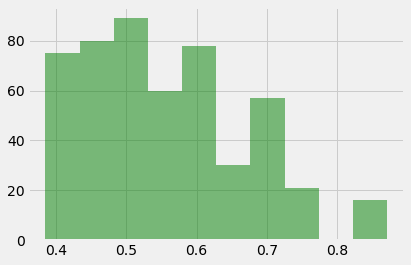

In [5]:
plt.hist(df["NOX"], alpha=0.5, color='g')

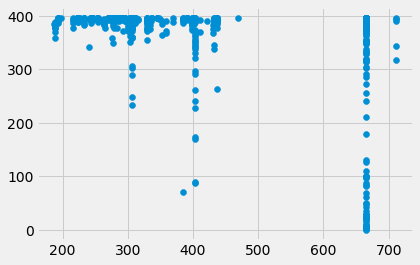

In [6]:
plt.scatter(df['TAX'],df['B'])

In [7]:
plt.scatter(df['TAX'],df['MEDV'])

KeyError: 'MEDV'

(array([5., 7., 5., 3., 5., 1., 1., 4., 0., 4.]),
 array([0.401, 0.448, 0.495, 0.542, 0.589, 0.636, 0.683, 0.73 , 0.777,
        0.824, 0.871]),
 <BarContainer object of 10 artists>)

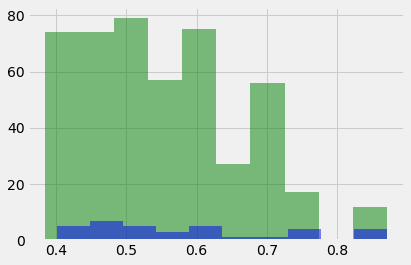

In [26]:
plt.hist(df[df["CHAS"]<1]["NOX"], alpha=0.5, color='g')
plt.hist(df[df["CHAS"]>0]["NOX"], alpha=0.5, color='b')
# to see if charles river has a correlation with NO concentration

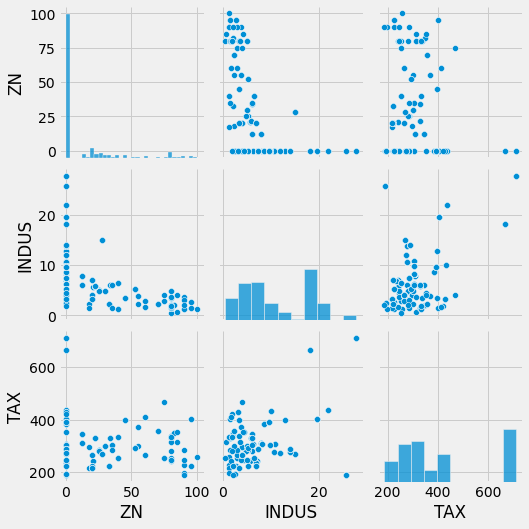

In [25]:
sns.pairplot(df_fewer_columns);

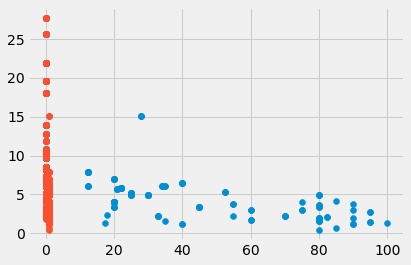

In [46]:
# above, the ZN is concentrated either at 0 or scattered. What does the plot look like without the data points near 0?

plt.scatter(df['ZN'],df['INDUS'])

# how can I slice vertically?
plt.scatter(df['ZN']>10,df['INDUS'])


(array([35., 43., 22., 14.,  0.,  8.,  0.,  2.,  0., 10.]),
 array([0.385 , 0.4112, 0.4374, 0.4636, 0.4898, 0.516 , 0.5422, 0.5684,
        0.5946, 0.6208, 0.647 ]),
 <BarContainer object of 10 artists>)

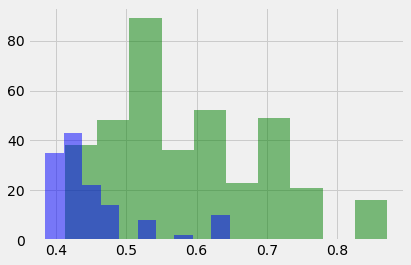

In [48]:
plt.hist(df[df["ZN"]<10]["NOX"], alpha=0.5, color='g')
plt.hist(df[df["ZN"]>10]["NOX"], alpha=0.5, color='b')